# In-Class Exercise: Dimensionality Reduction with PCA and t-SNE - SOLUTIONS

**Time: 10 minutes**

This notebook contains the complete solutions to the in-class exercise.

---


## Setup: Load the Data

We'll use the Wine dataset, which has 13 features (chemical properties) and 3 wine classes.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Load the wine dataset
wine = load_wine()
X = wine.data
y = wine.target

print(f"Dataset shape: {X.shape}")
print(f"Number of features: {X.shape[1]}")
print(f"Number of samples: {X.shape[0]}")
print(f"Classes: {wine.target_names}")


Dataset shape: (178, 13)
Number of features: 13
Number of samples: 178
Classes: ['class_0' 'class_1' 'class_2']


## Part 1: Data Preprocessing (2 minutes)

**Task:** Before applying PCA, we need to standardize the data. Why is this important?

**Answer:** Standardization is important because PCA identifies directions with maximum variance. If features have different scales (e.g., one feature in grams and another in milligrams), the features with larger scales will dominate the principal components. Standardizing ensures all features are on the same scale (mean=0, std=1) so they contribute equally to the analysis. This is equivalent to working with the correlation matrix instead of the covariance matrix.

---

Complete the code below to standardize the data:


In [2]:
# SOLUTION: Create a StandardScaler and fit_transform the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Verify: the mean should be ~0 and std should be ~1
print(f"Mean of first feature (should be ~0): {X_scaled[:, 0].mean():.6f}")
print(f"Std of first feature (should be ~1): {X_scaled[:, 0].std():.6f}")


Mean of first feature (should be ~0): 0.000000
Std of first feature (should be ~1): 1.000000


## Part 2: Apply PCA (3 minutes)

**Task:** Apply PCA to reduce the data from 13 dimensions to 2 dimensions for visualization.


In [3]:
# SOLUTION: Create a PCA object with 2 components and fit_transform the scaled data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print(f"Reduced data shape: {X_pca.shape}")

# Calculate explained variance
explained_var = pca.explained_variance_ratio_
print(f"\nExplained variance by PC1: {explained_var[0]:.3f}")
print(f"Explained variance by PC2: {explained_var[1]:.3f}")
print(f"Total explained variance: {explained_var.sum():.3f}")


Reduced data shape: (178, 2)

Explained variance by PC1: 0.362
Explained variance by PC2: 0.192
Total explained variance: 0.554


/Users/tgardos/Source/courses/ds701/DS701-Course-Notes/.venv/lib/python3.10/site-packages/sklearn/decomposition/_pca.py:606: RuntimeWarning: divide by zero encountered in matmul
  C = X.T @ X
/Users/tgardos/Source/courses/ds701/DS701-Course-Notes/.venv/lib/python3.10/site-packages/sklearn/decomposition/_pca.py:606: RuntimeWarning: overflow encountered in matmul
  C = X.T @ X
/Users/tgardos/Source/courses/ds701/DS701-Course-Notes/.venv/lib/python3.10/site-packages/sklearn/decomposition/_pca.py:606: RuntimeWarning: invalid value encountered in matmul
  C = X.T @ X


**Discussion Question:** What percentage of the total variance is explained by the first two principal components? Is this enough?

**Answer:** The first two principal components typically explain around 55-56% of the total variance in the wine dataset. Whether this is "enough" depends on the application. For visualization purposes, this is reasonable as we can still see meaningful patterns and clustering. However, if we needed to use PCA for dimensionality reduction before modeling, we might want to retain more components (e.g., enough to explain 90-95% of variance).


## Part 3: Visualize PCA Results (2 minutes)

**Task:** Complete the plotting code to visualize the wine data in the PCA space.


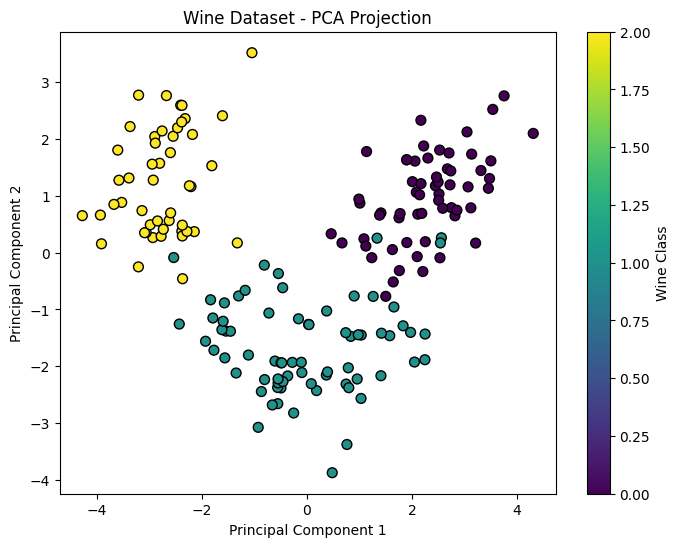

In [4]:
# SOLUTION: Complete the scatter plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], 
                     c=y,  # Color by wine class labels
                     cmap='viridis', 
                     edgecolor='k', 
                     s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Wine Dataset - PCA Projection')
plt.colorbar(scatter, label='Wine Class')
plt.show()


**Discussion Question:** Are the three wine classes well-separated in the PCA space?

**Answer:** In the PCA projection, we can see that Class 0 (one wine type) is relatively well-separated from the other two classes. Classes 1 and 2 show some overlap but are still somewhat distinguishable. The separation is decent but not perfect, which makes sense given that only ~55% of the variance is captured by these two components.


## Part 4: Compare with t-SNE (3 minutes)

**Task:** Apply t-SNE to the same dataset and compare the results with PCA.


In [5]:
# SOLUTION: Apply t-SNE with perplexity=30 and random_state=42
tsne = TSNE(n_components=2, 
            perplexity=30,
            random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

print(f"t-SNE reduced data shape: {X_tsne.shape}")


/Users/tgardos/Source/courses/ds701/DS701-Course-Notes/.venv/lib/python3.10/site-packages/sklearn/utils/extmath.py:335: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/tgardos/Source/courses/ds701/DS701-Course-Notes/.venv/lib/python3.10/site-packages/sklearn/utils/extmath.py:335: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/tgardos/Source/courses/ds701/DS701-Course-Notes/.venv/lib/python3.10/site-packages/sklearn/utils/extmath.py:335: RuntimeWarning: invalid value encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/tgardos/Source/courses/ds701/DS701-Course-Notes/.venv/lib/python3.10/site-packages/sklearn/utils/extmath.py:336: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/Users/tgardos/Source/courses/ds701/DS701-Course-Notes/.venv/lib/python3.10/site-packages/sklearn/utils/extmath.py:336: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/Users/tg

t-SNE reduced data shape: (178, 2)


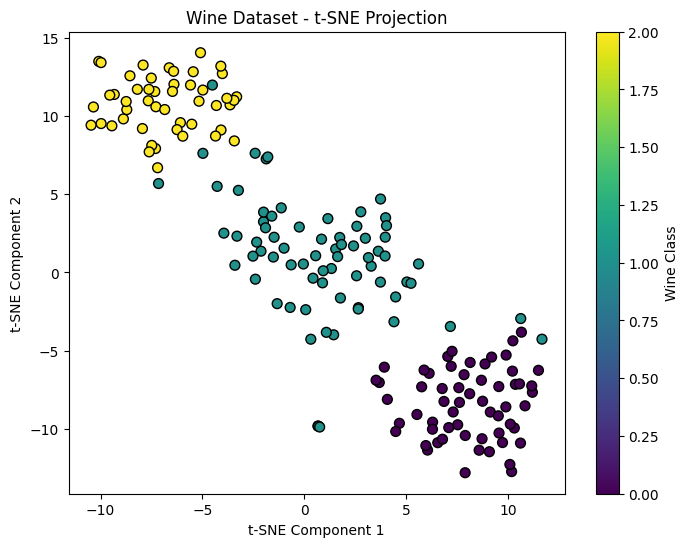

In [6]:
# Visualize t-SNE results
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], 
                     c=y, 
                     cmap='viridis', 
                     edgecolor='k', 
                     s=50)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('Wine Dataset - t-SNE Projection')
plt.colorbar(scatter, label='Wine Class')
plt.show()


## Part 5: Comparison and Discussion

**Group Discussion Questions:**

1. **Separation:** Which method (PCA or t-SNE) shows better separation between the three wine classes?

2. **Interpretability:** Can you interpret what PC1 and PC2 represent? Can you interpret what the t-SNE components represent?

3. **Use Cases:** Based on what you learned in the lecture:
   - When would you use PCA over t-SNE?
   - When would you use t-SNE over PCA?

4. **Limitations:** What are the key limitations of each method?

---

**Sample Answers:**

**1. Separation:**
t-SNE typically shows better visual separation between the three wine classes compared to PCA. t-SNE creates tighter, more distinct clusters because it focuses on preserving local neighborhood structure. The clusters in t-SNE are often more compact and clearly separated, while PCA may show more overlap between classes.

**2. Interpretability:**
- **PCA:** PC1 and PC2 are linear combinations of the original 13 features. We can examine the loadings (coefficients) to understand which chemical properties contribute most to each component. For example, PC1 might be a weighted combination of alcohol content, flavonoids, and color intensity.
- **t-SNE:** The t-SNE components are NOT interpretable. They don't correspond to any specific chemical properties or linear combinations of features. They are solely useful for visualization and understanding the clustering structure.

**3. Use Cases:**
- **Use PCA when:**
  - You need to reduce dimensionality before feeding data to a machine learning model
  - You want to understand which features contribute most to variance
  - You need a deterministic, reproducible result
  - You're working with very large datasets (PCA is much faster)
  - You need to preserve global structure and distances
  
- **Use t-SNE when:**
  - Your primary goal is visualization (2D or 3D)
  - You want to discover hidden clusters or patterns in the data
  - Local neighborhood relationships are more important than global structure
  - You have time for computation (t-SNE is slower)

**4. Limitations:**
- **PCA Limitations:**
  - Linear method - may miss nonlinear patterns in the data
  - May lose important information if variance doesn't capture what's meaningful
  - First few components may not always be the most useful for classification
  - Assumes that directions of maximum variance are most important
  
- **t-SNE Limitations:**
  - Only for visualization - cannot use for preprocessing before modeling
  - Non-deterministic (different runs give different results)
  - Distances between clusters are NOT meaningful
  - Very slow on large datasets (>10,000 samples)
  - Hyperparameter sensitive (perplexity matters a lot)
  - Cannot interpret the axes or components


---

## Bonus Challenge: Different Perplexity Values

Experimenting with different perplexity values for t-SNE (e.g., 5, 15, 50). How does this affect the clustering visualization?


/Users/tgardos/Source/courses/ds701/DS701-Course-Notes/.venv/lib/python3.10/site-packages/sklearn/utils/extmath.py:335: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/tgardos/Source/courses/ds701/DS701-Course-Notes/.venv/lib/python3.10/site-packages/sklearn/utils/extmath.py:335: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/tgardos/Source/courses/ds701/DS701-Course-Notes/.venv/lib/python3.10/site-packages/sklearn/utils/extmath.py:335: RuntimeWarning: invalid value encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/tgardos/Source/courses/ds701/DS701-Course-Notes/.venv/lib/python3.10/site-packages/sklearn/utils/extmath.py:336: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/Users/tgardos/Source/courses/ds701/DS701-Course-Notes/.venv/lib/python3.10/site-packages/sklearn/utils/extmath.py:336: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/Users/tg

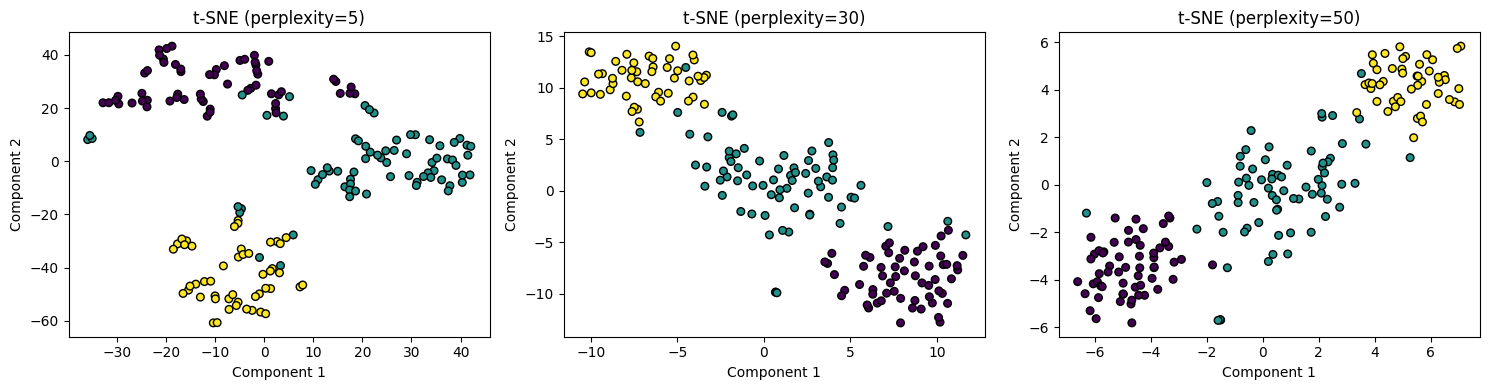

In [7]:
# Bonus: Experiment with different perplexity values
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
perplexities = [5, 30, 50]

for idx, perp in enumerate(perplexities):
    tsne_temp = TSNE(n_components=2, perplexity=perp, random_state=42)
    X_tsne_temp = tsne_temp.fit_transform(X_scaled)
    
    scatter = axes[idx].scatter(X_tsne_temp[:, 0], X_tsne_temp[:, 1], 
                               c=y, cmap='viridis', edgecolor='k', s=30)
    axes[idx].set_title(f't-SNE (perplexity={perp})')
    axes[idx].set_xlabel('Component 1')
    axes[idx].set_ylabel('Component 2')

plt.tight_layout()
plt.show()


**Observations about Perplexity:**

- **Low perplexity (5):** Focuses on very local structure. May create many small, tight clusters. Can fragment what should be single clusters into multiple pieces. Good for finding fine-grained local patterns.

- **Medium perplexity (30):** Default value that often works well. Balances local and global structure. Tends to produce clear, meaningful clusters without over-fragmentation.

- **High perplexity (50):** Considers broader neighborhoods. May produce looser clusters with more overlap. Better captures global structure but may miss some local details. More appropriate for larger datasets.

**Key Takeaway:** Always try multiple perplexity values (typically between 5-50) and look for consistent patterns across different settings. The "best" perplexity depends on your dataset size and the structure you're trying to reveal.
